In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn import metrics

print('Done importing!')

Done importing!


In [2]:
sns.set(rc={'figure.figsize':(13, 10)})

In [3]:
df = pd.read_csv('bike_sharing.csv')

In [4]:
df.sample(5)

,Unnamed: 0,instant,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1579,1579,1580,2011-03-11,Spring,7,No,Friday,Yes,1,0.26,0.2576,0.70,0.1940,10,104,114
5945,5945,5946,2011-09-10,Autumn,6,No,Saturday,No,1,0.58,0.5455,0.94,0.1642,0,6,6
16853,16853,16854,2012-12-10,Winter,0,No,Monday,Yes,3,0.36,0.3636,1.00,0.0896,0,20,20
9066,9066,9067,2012-01-18,Spring,16,No,Wednesday,Yes,1,0.28,0.2273,0.30,0.5224,13,163,176
12787,12787,12788,2012-06-22,Autumn,0,No,Friday,Yes,2,0.76,0.7273,0.70,0.1045,16,77,93


In [5]:
df.columns

Index(['Unnamed: 0', 'instant', 'dteday', 'season', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [7]:
df.drop('instant', inplace=True, axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
dteday        17379 non-null object
season        17379 non-null object
hr            17379 non-null int64
holiday       17379 non-null object
weekday       17379 non-null object
workingday    17379 non-null object
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.9+ MB


In [9]:
df.head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,No,Saturday,No,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,1,No,Saturday,No,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2,No,Saturday,No,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,3,No,Saturday,No,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,4,No,Saturday,No,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
df.columns

Index(['dteday', 'season', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
dteday        17379 non-null object
season        17379 non-null object
hr            17379 non-null int64
holiday       17379 non-null object
weekday       17379 non-null object
workingday    17379 non-null object
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.9+ MB


In [12]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
dteday        17379 non-null datetime64[ns]
season        17379 non-null object
hr            17379 non-null int64
holiday       17379 non-null object
weekday       17379 non-null object
workingday    17379 non-null object
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 1.9+ MB


In [14]:
def extract_date(df, column):
    df[column+"_day"] = df[column].apply(lambda x: x.day)
    df[column+"_month"] = df[column].apply(lambda x: x.month)
    df[column+"_year"] = df[column].apply(lambda x: x.year)

In [15]:
extract_date(df, 'dteday')

In [16]:
df.head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_day,dteday_month,dteday_year
0,2011-01-01,Spring,0,No,Saturday,No,1,0.24,0.2879,0.81,0.0,3,13,16,1,1,2011
1,2011-01-01,Spring,1,No,Saturday,No,1,0.22,0.2727,0.80,0.0,8,32,40,1,1,2011
2,2011-01-01,Spring,2,No,Saturday,No,1,0.22,0.2727,0.80,0.0,5,27,32,1,1,2011
3,2011-01-01,Spring,3,No,Saturday,No,1,0.24,0.2879,0.75,0.0,3,10,13,1,1,2011
4,2011-01-01,Spring,4,No,Saturday,No,1,0.24,0.2879,0.75,0.0,0,1,1,1,1,2011


In [17]:
df.weekday.value_counts()

Saturday     2512
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2453
Name: weekday, dtype: int64

In [18]:
df.columns

Index(['dteday', 'season', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'dteday_day', 'dteday_month', 'dteday_year'],
      dtype='object')

In [19]:
df = pd.get_dummies(df, columns=['season', 'holiday', 'weekday', 'workingday'])

In [20]:
df.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,...,holiday_Yes,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_No,workingday_Yes
0,2011-01-01,0,1,0.24,0.2879,0.81,0.0,3,13,16,...,0,0,0,1,0,0,0,0,1,0
1,2011-01-01,1,1,0.22,0.2727,0.80,0.0,8,32,40,...,0,0,0,1,0,0,0,0,1,0
2,2011-01-01,2,1,0.22,0.2727,0.80,0.0,5,27,32,...,0,0,0,1,0,0,0,0,1,0
3,2011-01-01,3,1,0.24,0.2879,0.75,0.0,3,10,13,...,0,0,0,1,0,0,0,0,1,0
4,2011-01-01,4,1,0.24,0.2879,0.75,0.0,0,1,1,...,0,0,0,1,0,0,0,0,1,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 28 columns):
dteday               17379 non-null datetime64[ns]
hr                   17379 non-null int64
weathersit           17379 non-null int64
temp                 17379 non-null float64
atemp                17379 non-null float64
hum                  17379 non-null float64
windspeed            17379 non-null float64
casual               17379 non-null int64
registered           17379 non-null int64
cnt                  17379 non-null int64
dteday_day           17379 non-null int64
dteday_month         17379 non-null int64
dteday_year          17379 non-null int64
season_Autumn        17379 non-null uint8
season_Spring        17379 non-null uint8
season_Summer        17379 non-null uint8
season_Winter        17379 non-null uint8
holiday_No           17379 non-null uint8
holiday_Yes          17379 non-null uint8
weekday_Friday       17379 non-null uint8
weekday_Monday       17379 non-nul

In [22]:
df.columns

Index(['dteday', 'hr', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'dteday_day', 'dteday_month',
       'dteday_year', 'season_Autumn', 'season_Spring', 'season_Summer',
       'season_Winter', 'holiday_No', 'holiday_Yes', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday_No', 'workingday_Yes'],
      dtype='object')

In [23]:
x = df[['hr', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'dteday_day', 'dteday_month',
       'dteday_year', 'season_Autumn', 'season_Spring', 'season_Summer',
       'season_Winter', 'holiday_No', 'holiday_Yes', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday_No', 'workingday_Yes']]

y = df['cnt']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

RMSE value for k=  1 is: 3.771257356417275
RMSE value for k=  2 is: 3.0948865544329935
RMSE value for k=  3 is: 2.8261942143762413
RMSE value for k=  4 is: 2.6586424360925154
RMSE value for k=  5 is: 2.5869660909666514
RMSE value for k=  6 is: 2.599447680656415
RMSE value for k=  7 is: 2.624910742822984
RMSE value for k=  8 is: 2.604704681669529
RMSE value for k=  9 is: 2.68815131571861
RMSE value for k=  10 is: 2.7933820566034644
RMSE value for k=  11 is: 2.8477808928790522
RMSE value for k=  12 is: 2.888938488344584
RMSE value for k=  13 is: 2.8826879754804455
RMSE value for k=  14 is: 2.9182989245040614
RMSE value for k=  15 is: 2.9668517718506746
RMSE value for k=  16 is: 3.0377345579569437
RMSE value for k=  17 is: 3.107064663767951
RMSE value for k=  18 is: 3.176027473680694
RMSE value for k=  19 is: 3.260796810513699
RMSE value for k=  20 is: 3.3384372485296985


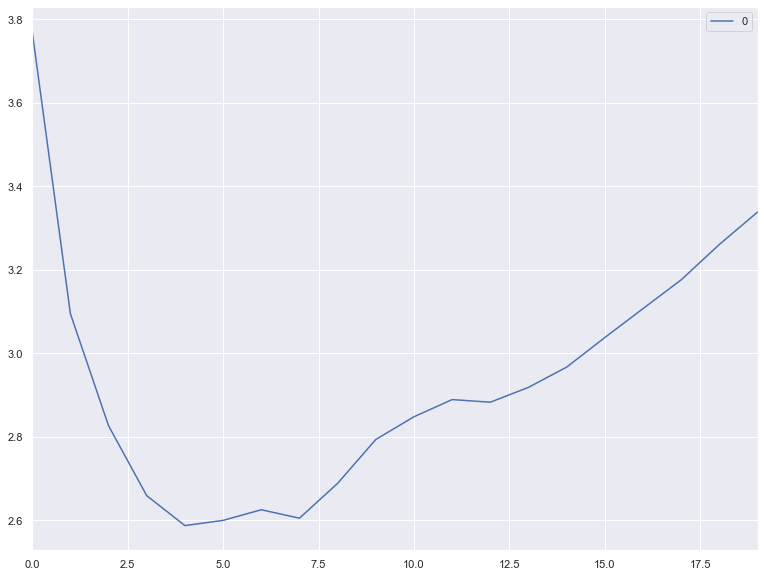

In [25]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = np.sqrt(metrics.mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [26]:
model = LinearRegression()  
model2 = DecisionTreeRegressor()
model3 = KNeighborsRegressor(n_neighbors=7)
model4 = RandomForestRegressor(n_estimators=100)
model5 = GradientBoostingRegressor()

In [27]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
model2.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [29]:
model3.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [30]:
model4.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [31]:
model5.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
#coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficients'])

In [33]:
y_pred = model.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)
y_pred4 = model4.predict(x_test)
y_pred5 = model5.predict(x_test)

In [34]:
df_valid = pd.DataFrame({'Actual':y_test, 'Linear Regression':y_pred, 'Decision Tree':y_pred2, 'K Nearest Neighbors':y_pred3, 'Random Forest':y_pred4, 'Gradient Booster':y_pred5})
df_valid

,Actual,Linear Regression,Decision Tree,K Nearest Neighbors,Random Forest,Gradient Booster
12818,78,78.0,77.0,76.857143,77.86,77.936882
7132,39,39.0,39.0,39.000000,38.94,37.058515
4920,174,174.0,177.0,173.571429,174.33,171.765162
17329,54,54.0,54.0,53.428571,53.80,56.481822
13957,811,811.0,814.0,815.142857,812.56,804.148814
509,19,19.0,19.0,18.857143,19.00,18.505408
10186,137,137.0,135.0,136.428571,137.08,137.255044
10362,205,205.0,202.0,209.571429,204.99,210.414578
11123,463,463.0,453.0,464.285714,454.72,445.261985
15845,479,479.0,476.0,481.285714,478.28,485.666062


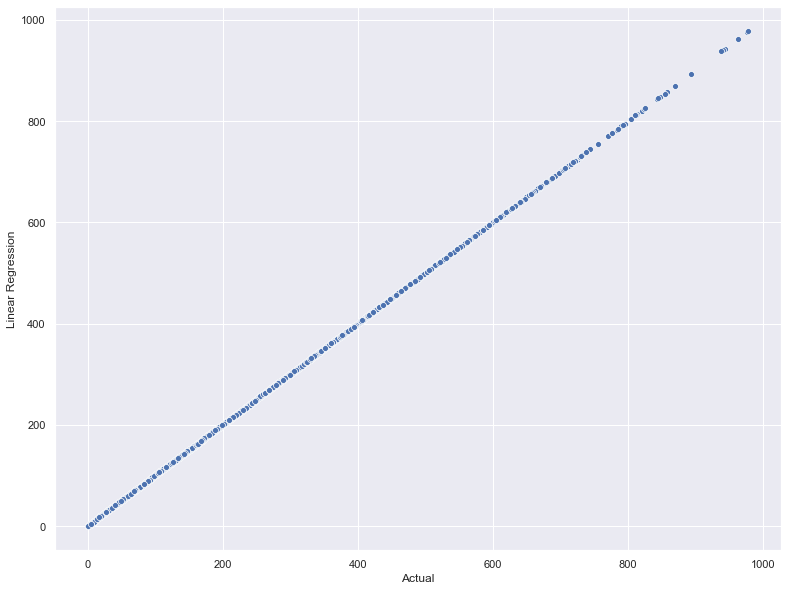

In [35]:
sns.scatterplot('Actual', 'Linear Regression', data=df_valid)

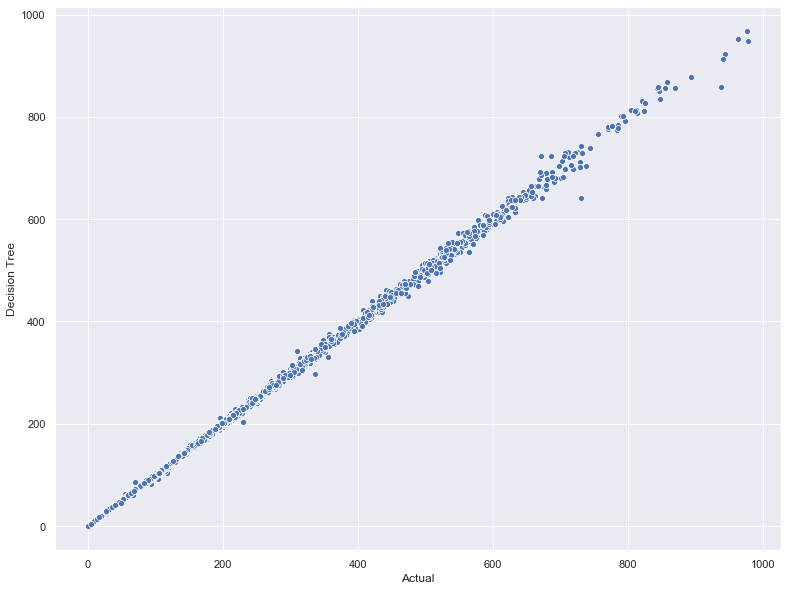

In [36]:
sns.scatterplot('Actual', 'Decision Tree', data=df_valid)

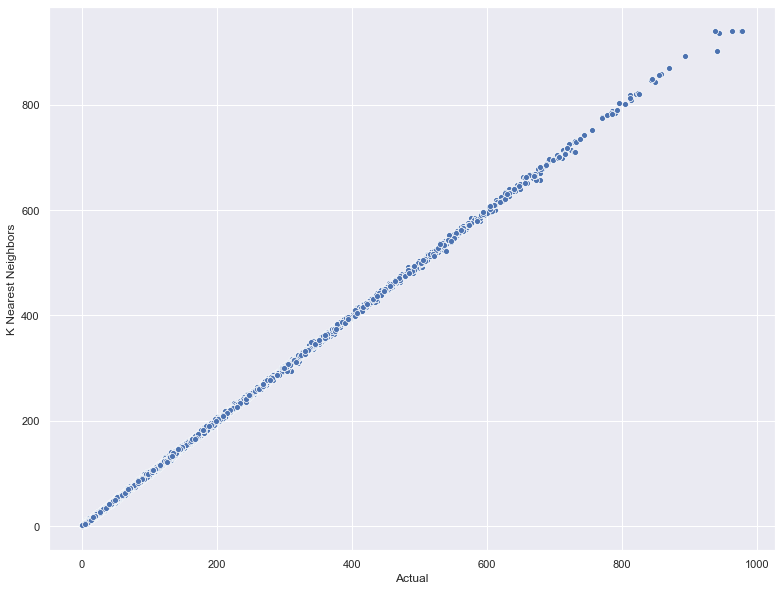

In [37]:
sns.scatterplot('Actual', 'K Nearest Neighbors', data=df_valid)

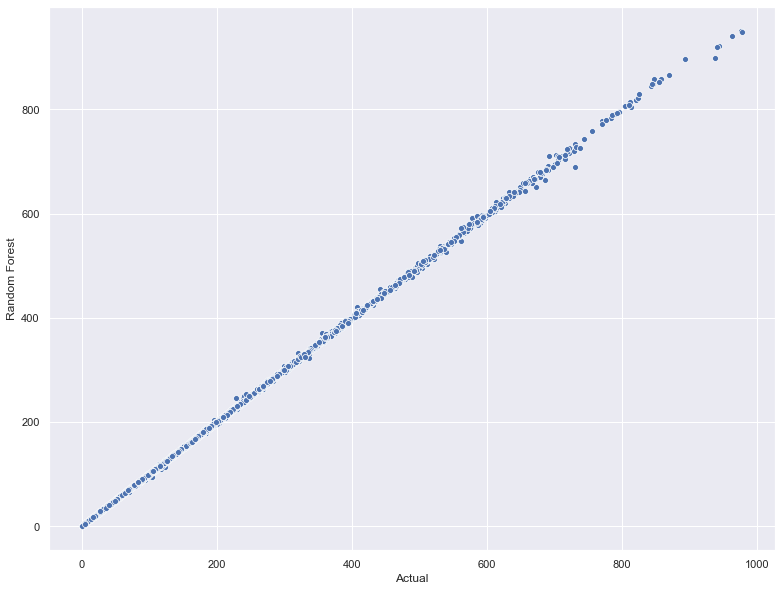

In [38]:
sns.scatterplot('Actual', 'Random Forest', data=df_valid)

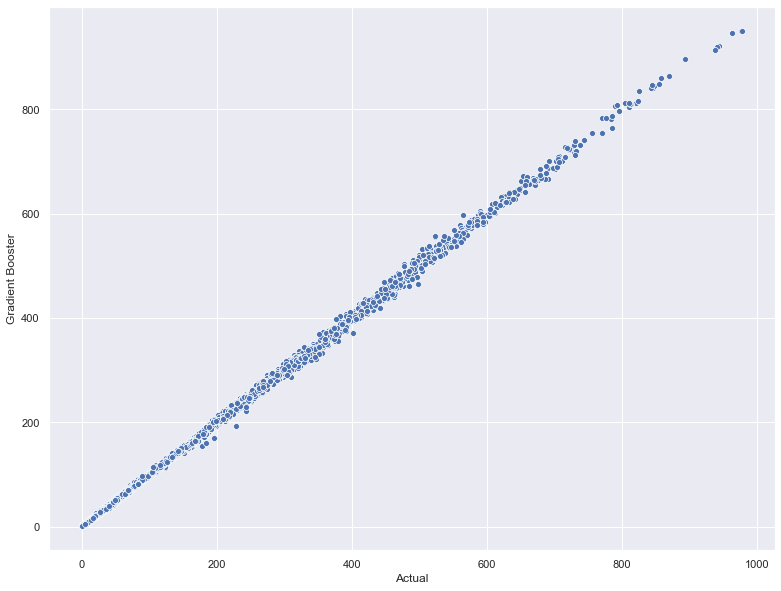

In [39]:
sns.scatterplot('Actual', 'Gradient Booster', data=df_valid)

In [40]:
lr_mae = metrics.mean_absolute_error(y_test, y_pred)
lr_mse = metrics.mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('LINEAR REGRESSION')
print('Mean Absolute Error:', lr_mae)  
print('Mean Squared Error:', lr_mse)  
print('Root Mean Squared Error:', lr_rmse)  

LINEAR REGRESSION
Mean Absolute Error: 1.629194158433021e-13
Mean Squared Error: 5.044330735978529e-26
Root Mean Squared Error: 2.245958756517699e-13


In [41]:
dt_mae = metrics.mean_absolute_error(y_test, y_pred2)
dt_mse = metrics.mean_squared_error(y_test, y_pred2)
dt_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))


print('DECISION TREE')
print('Mean Absolute Error:', dt_mae)  
print('Mean Squared Error:', dt_mse)  
print('Root Mean Squared Error:', dt_rmse)  

DECISION TREE
Mean Absolute Error: 2.3492520138089756
Mean Squared Error: 24.308400460299193
Root Mean Squared Error: 4.930355003475834


In [42]:
knn_mae = metrics.mean_absolute_error(y_test, y_pred3)
knn_mse = metrics.mean_squared_error(y_test, y_pred3)
knn_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred3))

print('K NEAREST NEIGHBORS')
print('Mean Absolute Error:', knn_mae)  
print('Mean Squared Error:', knn_mse)  
print('Root Mean Squared Error:', knn_rmse)  

K NEAREST NEIGHBORS
Mean Absolute Error: 1.6368979122143676
Mean Squared Error: 6.890156407787508
Root Mean Squared Error: 2.624910742822984


In [43]:
rf_mae = metrics.mean_absolute_error(y_test, y_pred4)
rf_mse = metrics.mean_squared_error(y_test, y_pred4)
rf_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred4))

print('RANDOM FOREST')
print('Mean Absolute Error:', rf_mae)  
print('Mean Squared Error:', rf_mse)  
print('Root Mean Squared Error:', rf_rmse)  

RANDOM FOREST
Mean Absolute Error: 0.9379372842347522
Mean Squared Error: 5.22608000575374
Root Mean Squared Error: 2.286062117649855


In [44]:
gb_mae = metrics.mean_absolute_error(y_test, y_pred5)
gb_mse = metrics.mean_squared_error(y_test, y_pred5)
gb_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred5))

print('GRADIENT BOOSTER')
print('Mean Absolute Error:', gb_mae)  
print('Mean Squared Error:', gb_mse)  
print('Root Mean Squared Error:', gb_rmse)  

GRADIENT BOOSTER
Mean Absolute Error: 3.380896097609727
Mean Squared Error: 29.679025196274818
Root Mean Squared Error: 5.4478459225894795


In [45]:
model_comparison = {
    'Algorithm': ['Linear Regression', 'Decision Tree', 'Nearest Neighbour', 'Random Forest', 'Gradient Booster'],
    'Mean Absolute Error': [lr_mae, dt_mae, knn_mae, rf_mae, gb_mae],
    'Mean Squared Error': [lr_mse, dt_mse, knn_mse, rf_mse, gb_mse],
    'Root Mean Squared Error': [lr_rmse, dt_rmse, knn_rmse, rf_rmse, gb_rmse]
}

model_scores = pd.DataFrame(model_comparison)
model_scores

,Algorithm,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,1.629194e-13,5.044331e-26,2.245959e-13
1,Decision Tree,2.349252e+00,2.430840e+01,4.930355e+00
2,Nearest Neighbour,1.636898e+00,6.890156e+00,2.624911e+00
3,Random Forest,9.379373e-01,5.226080e+00,2.286062e+00
4,Gradient Booster,3.380896e+00,2.967903e+01,5.447846e+00


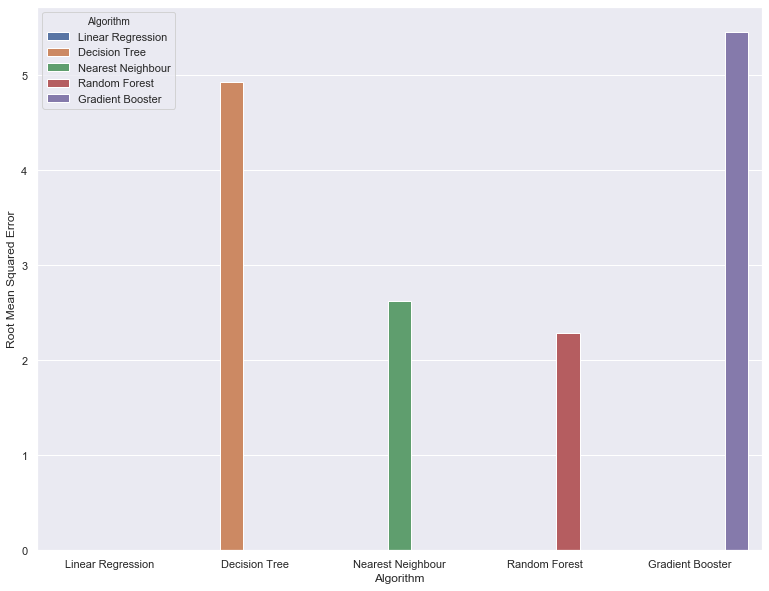

In [46]:
sns.barplot(y = 'Root Mean Squared Error', x = 'Algorithm', data=model_scores, hue='Algorithm')

In [47]:
import pandas_profiling as pp

In [50]:
pp.ProfileReport(df)

Number of variables,28
Number of observations,17379
Total Missing (%),0.0%
Total size in memory,2.0 MiB
Average record size in memory,119.0 B
Numeric,9
Categorical,0
Boolean,16
Date,1
Text (Unique),0
Rejected,2
